# Importação de bibliotecas

In [44]:
pip install joblib

In [47]:
import tensorflow as tf  # Importa o TensorFlow, uma biblioteca de machine learning
from tensorflow.keras import datasets, layers, models  # Importa módulos específicos do TensorFlow para criar e treinar modelos
import matplotlib.pyplot as plt  # Importa o Matplotlib para criar gráficos
import keras  # Importa o Keras, uma API de alto nível para redes neurais, agora integrada ao TensorFlow
import numpy as np  # Importa o NumPy, uma biblioteca para operações numéricas em arrays
import time  # Importa o módulo time para medir o tempo de execução
import psutil  # Importa o Psutil para monitorar o uso de recursos do sistema, como memória e CPU
import joblib # Importa o joblib para salvamento do modelo

# Carregamento do cifar-10 e Pré-Processamento

In [7]:
# Carrega os dados CIFAR-10, dividindo em conjuntos de treinamento e teste
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normaliza os valores dos pixels das imagens para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Construção de Modelo de Classificação

Construção de modelo sem as técnicas de otimização e construção de modelo com as técnicas de otimização

## Modelo de Classificação sem as Técnicas de Otimização

In [8]:
# Cria um modelo sequencial
model = models.Sequential()

# Adiciona uma camada de convolução com 32 filtros, tamanho do kernel de 3x3, e função de ativação ReLU
# Define a forma de entrada como 32x32 pixels com 3 canais de cor (RGB)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Adiciona uma camada de pooling (subamostragem) com tamanho de pool de 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Adiciona uma segunda camada de convolução com 64 filtros e função de ativação ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adiciona uma segunda camada de pooling com tamanho de pool de 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Adiciona uma terceira camada de convolução com 64 filtros e função de ativação ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Achata a saída 3D para 1D para ser usada pela camada totalmente conectada
model.add(layers.Flatten())

# Adiciona uma camada densa (totalmente conectada) com 64 unidades e função de ativação ReLU
model.add(layers.Dense(64, activation='relu'))

# Adiciona uma camada densa (totalmente conectada) de saída com 10 unidades (uma para cada classe) sem ativação
model.add(layers.Dense(10))

### Compilação do Modelo

In [9]:
# Compila o modelo usando o otimizador 'adam'
# Configura a função de perda como a entropia cruzada categórica esparsa,
# adequada para problemas de classificação com rótulos inteiros
# A opção from_logits=True indica que a função de perda espera que as previsões do modelo
# não tenham sido normalizadas pelo softmax
# Adiciona a métrica de precisão como métrica para monitorar durante o treinamento
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Treinamento do Modelo

In [10]:
# Treina o modelo usando os dados de treinamento
# Define o número de épocas como 10, ou seja, o modelo será treinado em todo o conjunto de dados 10 vezes
# Define o tamanho do lote como 64, o que significa que cada vez que os pesos do modelo são atualizados,
# ele verá 64 exemplos de treinamento
# Usa os dados de teste como dados de validação para monitorar o desempenho do modelo em um conjunto de dados não visto durante o treinamento
history = model.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/10
782/782 [==============================] - 66s 84ms/step - loss: 1.5711 - accuracy: 0.4248 - val_loss: 1.2879 - val_accuracy: 0.5340
Epoch 2/10
782/782 [==============================] - 58s 74ms/step - loss: 1.2243 - accuracy: 0.5656 - val_loss: 1.1338 - val_accuracy: 0.6009
Epoch 3/10
782/782 [==============================] - 62s 79ms/step - loss: 1.0635 - accuracy: 0.6257 - val_loss: 1.0210 - val_accuracy: 0.6400
Epoch 4/10
782/782 [==============================] - 60s 77ms/step - loss: 0.9663 - accuracy: 0.6626 - val_loss: 0.9892 - val_accuracy: 0.6568
Epoch 5/10
782/782 [==============================] - 62s 79ms/step - loss: 0.8964 - accuracy: 0.6872 - val_loss: 0.9794 - val_accuracy: 0.6531
Epoch 6/10
782/782 [==============================] - 60s 77ms/step - loss: 0.8415 - accuracy: 0.7044 - val_loss: 0.8844 - val_accuracy: 0.6900
Epoch 7/10
782/782 [==============================] - 59s 76ms/step - loss: 0.7905 - accuracy: 0.7235 - val_loss: 0.8947 - val_accuracy:

## Modelo de Classificação com as Técnicas de Otimização

Implementação das seguintes técnicas para evitar o sobreajuste, melhorar a acurácia, tempo de inferência e memória:

- Early Stopping;
- Dropout;
- Quantização;


### Early Stopping

In [11]:
# Cria um callback EarlyStopping para interromper o treinamento prematuramente se não houver melhora na perda de validação
# 'monitor' especifica a métrica a ser monitorada, neste caso, a perda de validação
# 'patience' define o número de épocas a serem esperadas após a parada do treinamento se não houver melhora
# 'restore_best_weights' indica se os pesos do modelo devem ser restaurados para os melhores pesos após a parada
# 'start_from_epoch' especifica a época a partir da qual começar a monitorar a paciência
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                          patience=2, restore_best_weights=True, start_from_epoch=2)

### Modelo com Dropout

In [12]:
# Cria um modelo sequencial
model_optimizer = models.Sequential()

# Adiciona uma camada de convolução com 32 filtros, função de ativação ReLU e tamanho de entrada (32, 32, 3)
model_optimizer.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Adiciona uma camada de pooling máxima com tamanho (2, 2)
model_optimizer.add(layers.MaxPooling2D((2, 2)))

# Adiciona uma segunda camada de convolução com 64 filtros e função de ativação ReLU
model_optimizer.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adiciona uma segunda camada de pooling máxima com tamanho (2, 2)
model_optimizer.add(layers.MaxPooling2D((2, 2)))

# Adiciona uma terceira camada de convolução com 64 filtros e função de ativação ReLU
model_optimizer.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Achata a saída para passar para as camadas totalmente conectadas
model_optimizer.add(layers.Flatten())

# Adiciona uma camada densa com 64 neurônios e função de ativação ReLU
model_optimizer.add(layers.Dense(64, activation='relu'))

# Adiciona uma camada de dropout com uma taxa de dropout de 0.5 para reduzir o overfitting
model_optimizer.add(layers.Dropout(0.5))

# Adiciona uma camada densa de saída com 10 neurônios para as 10 classes possíveis
model_optimizer.add(layers.Dense(10))

### Compilação do Modelo

In [13]:
# Compila o modelo otimizado
model_optimizer.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Treinamento do Modelo

In [14]:
# Treina o modelo otimizado usando os dados de treinamento e validação
history_optimizer = model_optimizer.fit(train_images, train_labels, epochs=10, batch_size=64,
                    validation_data=(test_images, test_labels), callbacks=[callback])

Epoch 1/10
782/782 [==============================] - 63s 80ms/step - loss: 1.7571 - accuracy: 0.3467 - val_loss: 1.3737 - val_accuracy: 0.5078
Epoch 2/10
782/782 [==============================] - 57s 74ms/step - loss: 1.4235 - accuracy: 0.4890 - val_loss: 1.1894 - val_accuracy: 0.5725
Epoch 3/10
782/782 [==============================] - 57s 73ms/step - loss: 1.2733 - accuracy: 0.5479 - val_loss: 1.1224 - val_accuracy: 0.5978
Epoch 4/10
782/782 [==============================] - 61s 78ms/step - loss: 1.1811 - accuracy: 0.5845 - val_loss: 1.1291 - val_accuracy: 0.6025
Epoch 5/10
782/782 [==============================] - 58s 74ms/step - loss: 1.1076 - accuracy: 0.6126 - val_loss: 0.9925 - val_accuracy: 0.6551
Epoch 6/10
782/782 [==============================] - 61s 79ms/step - loss: 1.0417 - accuracy: 0.6373 - val_loss: 0.9659 - val_accuracy: 0.6583
Epoch 7/10
782/782 [==============================] - 60s 77ms/step - loss: 0.9906 - accuracy: 0.6553 - val_loss: 0.9043 - val_accuracy:

### Quantização

In [15]:
# Converte o modelo Keras para o formato TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model_optimizer)

# Aplica otimizações de quantização ao modelo convertido
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Converte o modelo otimizado para o formato TensorFlow Lite quantizado
quantized_model = converter.convert()

# Cria um interpretador TensorFlow Lite com o modelo quantizado
interpreter = tf.lite.Interpreter(model_content=quantized_model)

# Aloca tensores para o interpretador TensorFlow Lite
interpreter.allocate_tensors()

### Salva o Modelo

In [53]:
model_optimizer.save('model_optimizer.h5')

joblib.dump(model_optimizer, 'model_optimizer.pkl')

['model_optimizer.pkl']

# Análise Comparativa e Visualizações Gráficas

## Avalição da Acurácia

In [25]:
# Inicia a contagem do tempo para medir o tempo de inferência do modelo original
start_time = time.time()

# Avalia o modelo original nos dados de teste e obtém a perda e a acurácia
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nAcurácia do Modelo sem os Otimizadores:', test_acc)

# Finaliza a contagem do tempo para medir o tempo de inferência do modelo original
end_time = time.time()

# Calcula o tempo de inferência do modelo original
original_inference_time = end_time - start_time
print(f'Tempo de Inferência do Modelo Original: {original_inference_time:.4f} segundos')

# Obtém os detalhes de entrada e saída do modelo quantizado
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Inicia a contagem do tempo para medir o tempo de inferência do modelo quantizado
start_time = time.time()

# Inicializa o contador de predições corretas
correct_predictions = 0

# Loop sobre os dados de teste para fazer inferência com o modelo quantizado
for i in range(len(test_images)):
    # Prepara os dados de entrada para o modelo quantizado
    input_data = np.expand_dims(test_images[i], axis=0).astype('float32')

    # Define os dados de entrada para o modelo quantizado
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Executa a inferência com o modelo quantizado
    interpreter.invoke()

    # Obtém a saída do modelo quantizado
    output = interpreter.get_tensor(output_details[0]['index'])

    # Verifica se a predição do modelo quantizado é correta
    if np.argmax(output) == test_labels[i]:
        correct_predictions += 1

# Finaliza a contagem do tempo para medir o tempo de inferência do modelo quantizado
end_time = time.time()

# Calcula o tempo de inferência do modelo quantizado
quantized_inference_time = end_time - start_time

# Calcula a acurácia do modelo quantizado
accuracy = correct_predictions / len(test_images)

# Imprime a acurácia do modelo quantizado e o tempo de inferência do modelo quantizado
print(f'\nAcurácia do Modelo com os Otimizadores: {accuracy:.4f}')
print(f'Tempo de Inferência do Modelo com os Otimizadores: {quantized_inference_time:.4f} segundos')

313/313 - 3s - loss: 0.8989 - accuracy: 0.6945 - 3s/epoch - 9ms/step

Acurácia do Modelo sem os Otimizadores: 0.6945000290870667
Tempo de Inferência do Modelo Original: 5.5768 segundos

Acurácia do Modelo com os Otimizadores: 0.6991
Tempo de Inferência do Modelo com os Otimizadores: 4.7155 segundos


## Gráfico da Acurácia sob Épocas

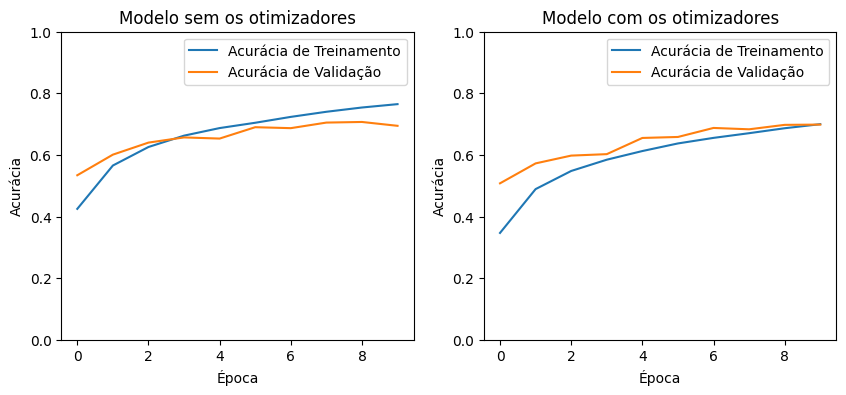

In [22]:
# Cria uma figura com tamanho 10x4 polegadas
plt.figure(figsize=(10, 4))

# Cria um subplot de uma linha e duas colunas, e seleciona o primeiro subplot
plt.subplot(1, 2, 1)

# Plota a acurácia de treinamento e validação do modelo sem otimizadores
plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0, 1])
plt.title('Modelo sem os otimizadores')
plt.legend()  # Adiciona a legenda

# Cria um subplot de uma linha e duas colunas, e seleciona o segundo subplot
plt.subplot(1, 2, 2)

# Plota a acurácia de treinamento e validação do modelo com otimizadores
plt.plot(history_optimizer.history['accuracy'], label='Acurácia de Treinamento')
plt.plot(history_optimizer.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0, 1])
plt.title('Modelo com os otimizadores')
plt.legend()  # Adiciona a legenda

# Exibe a figura
plt.show()

## Gráfico da Perda sob Épocas

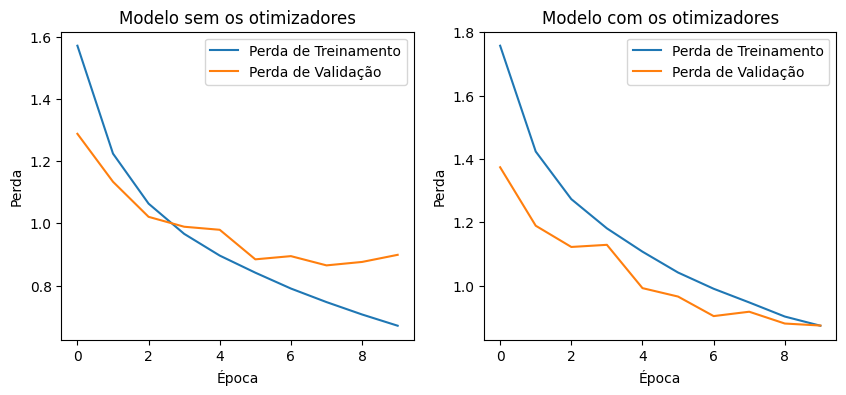

In [23]:
# Cria uma figura com tamanho 10x4 polegadas
plt.figure(figsize=(10, 4))

# Cria um subplot de uma linha e duas colunas, e seleciona o primeiro subplot
plt.subplot(1, 2, 1)

# Plota a perda de treinamento e validação do modelo original
plt.plot(history.history['loss'], label='Perda de Treinamento')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Modelo sem os otimizadores')
plt.legend()  # Adiciona a legenda

# Cria um subplot de uma linha e duas colunas, e seleciona o segundo subplot
plt.subplot(1, 2, 2)

# Plota a perda de treinamento e validação do modelo com otimizadores
plt.plot(history_optimizer.history['loss'], label='Perda de Treinamento')
plt.plot(history_optimizer.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Modelo com os otimizadores')
plt.legend()  # Adiciona a legenda

# Exibe a figura
plt.show()